In [1]:
# Import necessary libraries
import cv2
import numpy as np
import pandas as pd
from scipy.stats import entropy
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
from global_contrast_factor import GlobalContrastFactor

In [2]:
# Function to calculate entropy
def calculate_entropy(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    hist = np.histogram(image, bins=256)[0]  # Get histogram
    return entropy(hist)  # Calculate and return entropy

def entropy_quantiles(df):
    # Calculate and print initial quantiles
    quantiles = df['entropy'].quantile([0.25, 0.5, 0.75])
    print("Initial Entropy Quantiles:")
    print(quantiles)

    # Calculate Interquartile Range (IQR) for outlier detection
    Q1 = df['entropy'].quantile(0.25)
    Q3 = df['entropy'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define and filter outliers
    filter = (df['entropy'] >= Q1 - 1.5 * IQR) & (df['entropy'] <= Q3 + 1.5 * IQR)
    df_filtered = df.loc[filter]

    # Calculate and print quantiles without outliers
    quantiles_filtered = df_filtered['entropy'].quantile([0.25, 0.5, 0.75])
    print("Entropy Quantiles after Outliers Removed:")
    print(quantiles_filtered)

def summarize_and_plot_entropy(df, color='skyblue'):
    # Calculate statistical values
    mean_entropy = df['entropy'].mean()
    std_dev_entropy = df['entropy'].std()

    
    # Print statistical results
    print(f"Mean Entropy: {mean_entropy:.3f}")
    print(f"Standard Deviation of Entropy: {std_dev_entropy:.3f}")
    
    entropy_quantiles(df)

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['entropy'], color=color, bins='fd', alpha=0.7)
    plt.title('Histogram of Image Entropy')
    plt.xlabel('Entropy Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    

def compare_entropy_datasets(df_list, labels, color_list=None):
    if color_list is None:
        color_list = sns.color_palette('hsv', len(df_list))
    
    plt.figure(figsize=(14, 7))

    # Overlaid Histograms
    for df, label, color in zip(df_list, labels, color_list):
        sns.histplot(df['entropy'], label=label, color=color, element='step', stat='density', common_norm=False, alpha=0.5)

    plt.title('Comparison of Entropy Distributions')
    plt.xlabel('Entropy Values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Box Plot
    combined_df = pd.concat(df_list, keys=labels, names=['Dataset', 'Index'])
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='entropy', y='Dataset', data=combined_df.reset_index(), orient='h')
    plt.title('Box Plot of Entropy Across Datasets')
    plt.xlabel('Entropy')
    plt.ylabel('Dataset')
    plt.show()
    




In [3]:
def calculate_laplacian_variance(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()  # Compute Laplacian variance
    return laplacian_var


def laplacian_variance_quantiles(df):
    # Calculate and print initial quantiles
    quantiles = df['laplacian_variance'].quantile([0.25, 0.5, 0.75])
    print("Initial Laplacian Variance Quantiles:")
    print(quantiles)

    # Calculate Interquartile Range (IQR) for outlier detection
    Q1 = df['laplacian_variance'].quantile(0.25)
    Q3 = df['laplacian_variance'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define and filter outliers
    filter = (df['laplacian_variance'] >= Q1 - 1.5 * IQR) & (df['laplacian_variance'] <= Q3 + 1.5 * IQR)
    df_filtered = df.loc[filter]

    # Calculate and print quantiles without outliers
    quantiles_filtered = df_filtered['laplacian_variance'].quantile([0.25, 0.5, 0.75])
    print("Laplacian Variance Quantiles after Outliers Removed:")
    print(quantiles_filtered)


def summarize_and_plot_laplacian_variance(df, color='skyblue'):
    # Calculate statistical values
    mean_laplacian_variance = df['laplacian_variance'].mean()
    std_dev_laplacian_variance = df['laplacian_variance'].std()

    # Print statistical results
    print(f"Mean Laplacian Variance: {mean_laplacian_variance:.3f}")
    print(f"Standard Deviation of Laplacian Variance: {std_dev_laplacian_variance:.3f}")
    
    laplacian_variance_quantiles(df)

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['laplacian_variance'], color=color, bins='fd', alpha=0.7)
    plt.title('Histogram of Image Laplacian Variance')
    plt.xlabel('Laplacian Variance Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
def compare_laplacian_variance_datasets(df_list, labels, color_list=None):
    if color_list is None:
        color_list = sns.color_palette('hsv', len(df_list))
    
    plt.figure(figsize=(14, 7))

    # Overlaid Histograms
    for df, label, color in zip(df_list, labels, color_list):
        sns.histplot(df['laplacian_variance'], label=label, color=color, element='step', stat='density', common_norm=False, alpha=0.5)

    plt.title('Comparison of Laplacian Variance Distributions')
    plt.xlabel('Laplacian Variance Values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Box Plot
    combined_df = pd.concat(df_list, keys=labels, names=['Dataset', 'Index'])
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='laplacian_variance', y='Dataset', data=combined_df.reset_index(), orient='h')
    plt.title('Box Plot of Laplacian Variance Across Datasets')
    plt.xlabel('Laplacian Variance')
    plt.ylabel('Dataset')
    plt.show()



In [4]:
# Function to calculate Global Contrast Factor
def calculate_gcf(image_path):
    img = cv2.imread(image_path)  # Load the image
    gcf = GlobalContrastFactor()  # Initialize the GCF calculator
    return gcf(img)  # Calculate and return GCF
def gcf_quantiles(df):
    # Calculating quantiles
    quantiles = df['gcf'].quantile([0.25, 0.5, 0.75])
    print("Initial GCF Quantiles:")
    print(quantiles)

    # Interquartile Range for outlier detection
    Q1 = df['gcf'].quantile(0.25)
    Q3 = df['gcf'].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering outliers
    filter = (df['gcf'] >= Q1 - 1.5 * IQR) & (df['gcf'] <= Q3 + 1.5 * IQR)
    df_filtered = df.loc[filter]

    # Quantiles without outliers
    quantiles_filtered = df_filtered['gcf'].quantile([0.25, 0.5, 0.75])
    print("GCF Quantiles after Outliers Removed:")
    print(quantiles_filtered)

def summarize_and_plot_gcf(df, color='lightblue'):
    # Statistical summary
    mean_gcf = df['gcf'].mean()
    std_dev_gcf = df['gcf'].std()

    # Printing results
    print(f"Mean GCF: {mean_gcf:.3f}")
    print(f"Standard Deviation of GCF: {std_dev_gcf:.3f}")
    
    gcf_quantiles(df)

    # Histogram plot
    plt.figure(figsize=(10, 6))
    plt.hist(df['gcf'], color=color, bins='fd', alpha=0.7)
    plt.title('Histogram of Global Contrast Factor')
    plt.xlabel('GCF Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def compare_gcf_datasets(df_list, labels, color_list=None):
    if color_list is None:
        color_list = sns.color_palette('hsv', len(df_list))
    
    plt.figure(figsize=(14, 7))
    for df, label, color in zip(df_list, labels, color_list):
        sns.histplot(df['gcf'], label=label, color=color, element='step', stat='density', common_norm=False, alpha=0.5)

    plt.title('Comparison of GCF Distributions')
    plt.xlabel('GCF Values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Box Plot for comparing distributions
    combined_df = pd.concat(df_list, keys=labels, names=['Dataset', 'Index'])
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gcf', y='Dataset', data=combined_df.reset_index(), orient='h')
    plt.title('Box Plot of GCF Across Datasets')
    plt.xlabel('GCF')
    plt.ylabel('Dataset')
    plt.show()

In [5]:
def correlation_coefficient(df, dataset_label):
    # Calculate the Pearson correlation coefficient between 'gcf' and 'laplacian_variance'
    correlation = df['gcf'].corr(df['laplacian_variance'])
    print(f"Correlation Coefficient between GCF and Laplacian Variance in {dataset_label}: {correlation:.4f}")
    return correlation


In [16]:
def plot_correlation_between_two_variables(df, x_col, y_col, dataset_label=''):
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Calculate the Pearson correlation coefficient
    correlation = df[x_col].corr(df[y_col])
    plt.title(f'Correlation between {x_col} and {y_col} in {dataset_label}: {correlation:.4f}')
    plt.grid(True)
    
    # Show plot
    plt.show()

    return correlation

In [7]:
def display_image_metrics(df, dataset_title):
    # Calculate median for all metrics
    median_entropy = df['entropy'].median()
    median_lap_var = df['laplacian_variance'].median()
    median_gcf = df['gcf'].median()

    # Find the image(s) closest to the median values
    df['dist_from_median_entropy'] = abs(df['entropy'] - median_entropy)
    df['dist_from_median_lap_var'] = abs(df['laplacian_variance'] - median_lap_var)
    df['dist_from_median_gcf'] = abs(df['gcf'] - median_gcf)

    # Getting top, median, and bottom images for display
    top_entropy = df.nlargest(5, 'entropy')
    median_entropy_image = df.nsmallest(5, 'dist_from_median_entropy').sort_values('dist_from_median_entropy')
    bottom_entropy = df.nsmallest(5, 'entropy')

    top_lap_var = df.nlargest(5, 'laplacian_variance')
    median_lap_var_image = df.nsmallest(5, 'dist_from_median_lap_var').sort_values('dist_from_median_lap_var')
    bottom_lap_var = df.nsmallest(5, 'laplacian_variance')

    top_gcf = df.nlargest(5, 'gcf')
    median_gcf_image = df.nsmallest(5, 'dist_from_median_gcf').sort_values('dist_from_median_gcf')
    bottom_gcf = df.nsmallest(5, 'gcf')

    # Function to display images
    def display_images(top_df, median_df, bottom_df, metric_title):
        fig, axes = plt.subplots(3, 5, figsize=(25, 15))
        fig.suptitle(f"{dataset_title} - {metric_title}", fontsize=16)

        # Arrange dataframes in order of display: top, median, bottom
        all_images = [top_df, median_df, bottom_df]
        titles = ['Top', 'Median', 'Bottom']

        for row, imgs in enumerate(all_images):
            for col, idx in enumerate(imgs.index):
                image = plt.imread(imgs.at[idx, 'file_path'])
                axes[row, col].imshow(image, cmap='gray')
                axes[row, col].axis('off')
                axes[row, col].set_title(f"{titles[row]} {col+1}\n{imgs.at[idx, 'class']}\nEnt:{imgs.at[idx, 'entropy']:.2f}, "
                                         f"LapVar: {imgs.at[idx, 'laplacian_variance']:.2f}, "
                                         f"GCF: {imgs.at[idx, 'gcf']:.2f}", fontsize=10)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    # Display images for all metrics
    display_images(top_entropy, median_entropy_image, bottom_entropy, 'Images by Entropy')
    display_images(top_lap_var, median_lap_var_image, bottom_lap_var, 'Images by Laplacian Variance')
    display_images(top_gcf, median_gcf_image, bottom_gcf, 'Images by GCF')



In [8]:

# Directory containing images
chexpert_path = '/ssd2/pipeline/datasets/620_file_size/split3_dataset/CheXpert'
mimic_path = '/ssd2/pipeline/datasets/620_file_size/split3_dataset/MIMIC'
nih_path = '/ssd2/pipeline/datasets/620_file_size/split3_dataset/NIH'
padchest_path = '/ssd2/pipeline/datasets/620_file_size/split3_dataset/PadChest'

# Function to process images in a directory and calculate metrics
def directory_metrics(image_dir):
    results = []  # List to store results

    # Walk through all directories and subdirectories
    for root, _, files in os.walk(image_dir):
        for filename in files:
            if filename.endswith(".png"):  # Check for PNG images
                file_path = os.path.join(root, filename)
                entropy_value = calculate_entropy(file_path)
                laplacian_variance = calculate_laplacian_variance(file_path)
                gcf_value = calculate_gcf(file_path)  # Calculate Global Contrast Factor

                # Extract class and view from filename
                parts = filename.split('_')
                image_class = parts[2] if len(parts) >= 4 else 'Unknown'
                view = parts[3] if len(parts) >= 4 else 'Unknown'
                
                # Append data including class, view, and full file path
                results.append({
                    'file_name': filename,
                    'entropy': entropy_value,
                    'laplacian_variance': laplacian_variance,
                    'gcf': gcf_value,  # Include GCF result
                    'class': image_class,
                    'view': view,
                    'file_path': file_path  # Adding the full file path
                })

    # Create DataFrame from the results list
    results_df = pd.DataFrame(results)
    return results_df



Mean Entropy: 5.511
Standard Deviation of Entropy: 0.078
Initial Entropy Quantiles:
0.25    5.518079
0.50    5.527520
0.75    5.531817
Name: entropy, dtype: float64
Entropy Quantiles after Outliers Removed:
0.25    5.521792
0.50    5.528727
0.75    5.532222
Name: entropy, dtype: float64


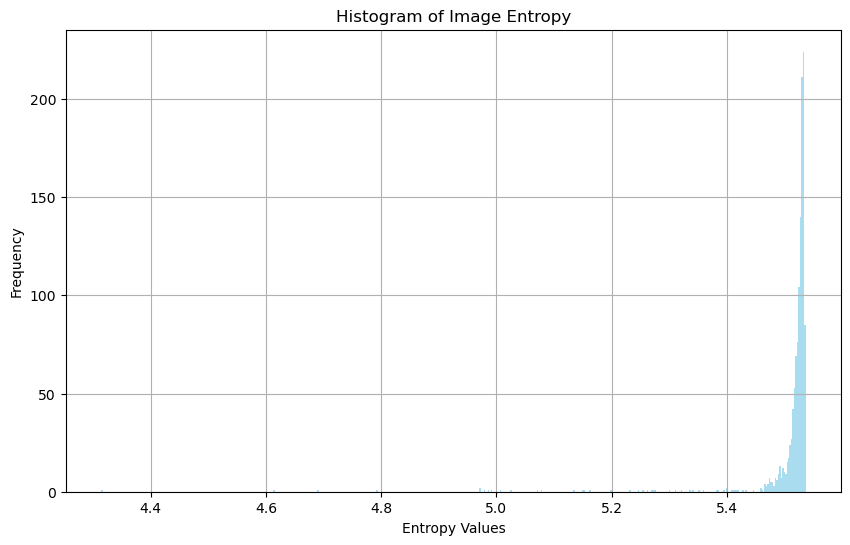

Mean Laplacian Variance: 873.251
Standard Deviation of Laplacian Variance: 253.861
Initial Laplacian Variance Quantiles:
0.25     721.150359
0.50     851.077754
0.75    1000.364448
Name: laplacian_variance, dtype: float64
Laplacian Variance Quantiles after Outliers Removed:
0.25    717.993805
0.50    844.641398
0.75    983.867524
Name: laplacian_variance, dtype: float64


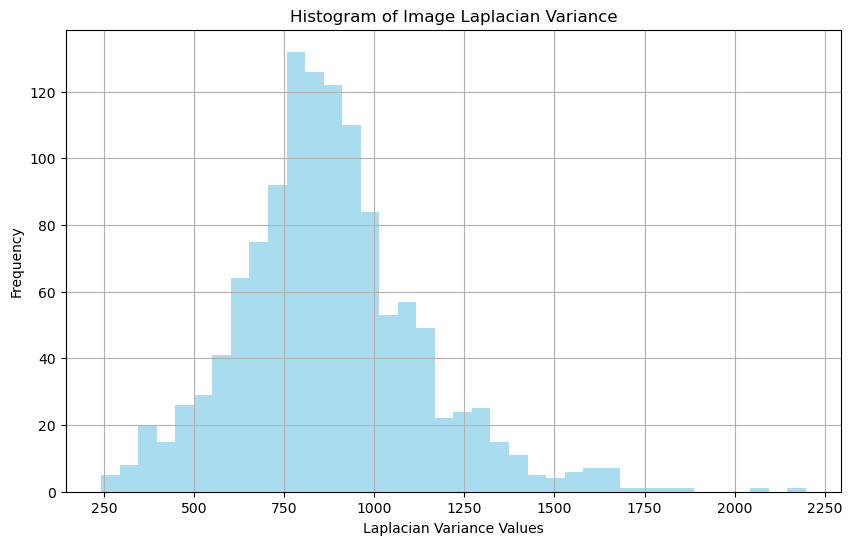

Mean GCF: 12.750
Standard Deviation of GCF: 1.574
Initial GCF Quantiles:
0.25    11.705452
0.50    12.724239
0.75    13.851934
Name: gcf, dtype: float64
GCF Quantiles after Outliers Removed:
0.25    11.711493
0.50    12.725147
0.75    13.854818
Name: gcf, dtype: float64


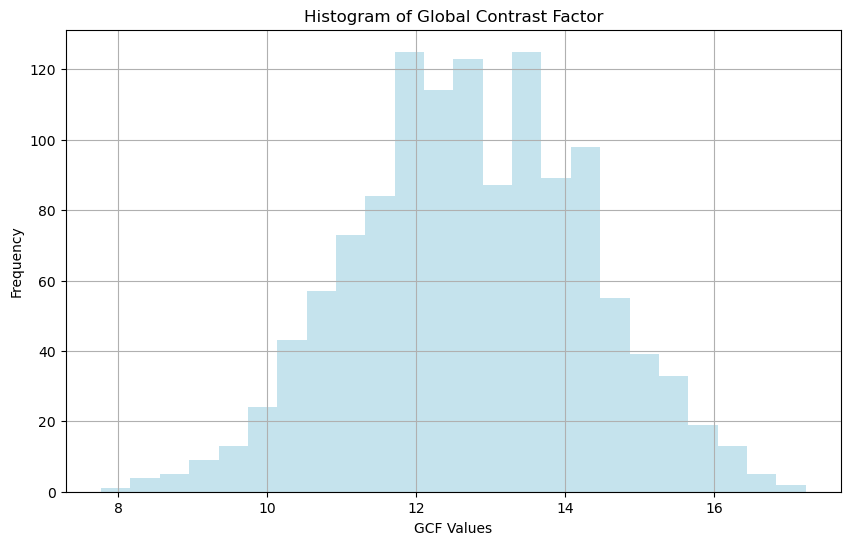

In [9]:
chexpert_metrics = directory_metrics(chexpert_path)
summarize_and_plot_entropy(chexpert_metrics)
summarize_and_plot_laplacian_variance(chexpert_metrics)
summarize_and_plot_gcf(chexpert_metrics)

Mean Entropy: 5.447
Standard Deviation of Entropy: 0.147
Initial Entropy Quantiles:
0.25    5.459189
0.50    5.489596
0.75    5.510420
Name: entropy, dtype: float64
Entropy Quantiles after Outliers Removed:
0.25    5.472365
0.50    5.494973
0.75    5.512253
Name: entropy, dtype: float64


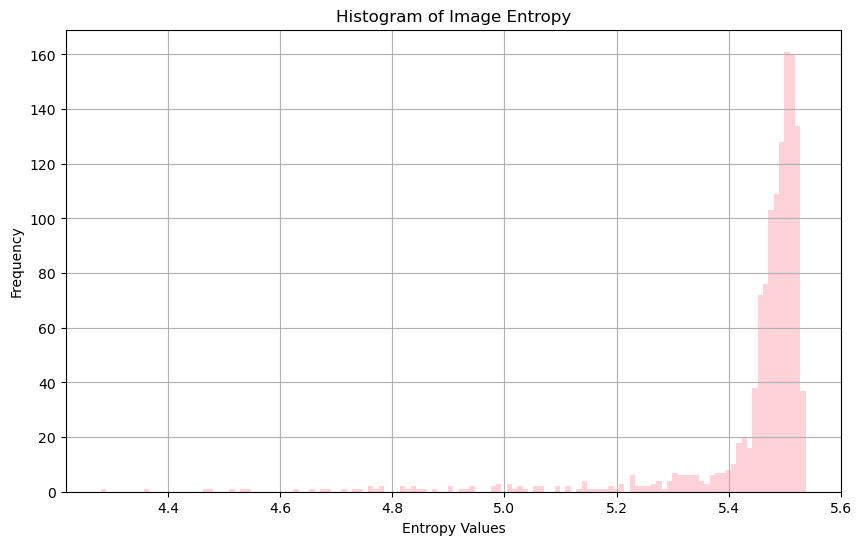

Mean Laplacian Variance: 242.836
Standard Deviation of Laplacian Variance: 120.619
Initial Laplacian Variance Quantiles:
0.25    168.225306
0.50    211.385381
0.75    283.454634
Name: laplacian_variance, dtype: float64
Laplacian Variance Quantiles after Outliers Removed:
0.25    165.304522
0.50    206.288302
0.75    266.467683
Name: laplacian_variance, dtype: float64


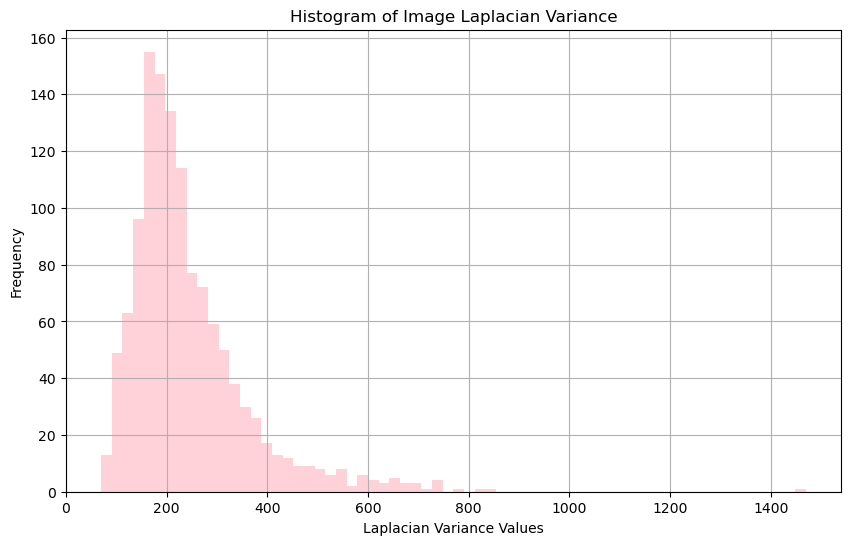

Mean GCF: 10.470
Standard Deviation of GCF: 1.712
Initial GCF Quantiles:
0.25     9.262864
0.50    10.525670
0.75    11.641648
Name: gcf, dtype: float64
GCF Quantiles after Outliers Removed:
0.25     9.263797
0.50    10.517170
0.75    11.619088
Name: gcf, dtype: float64


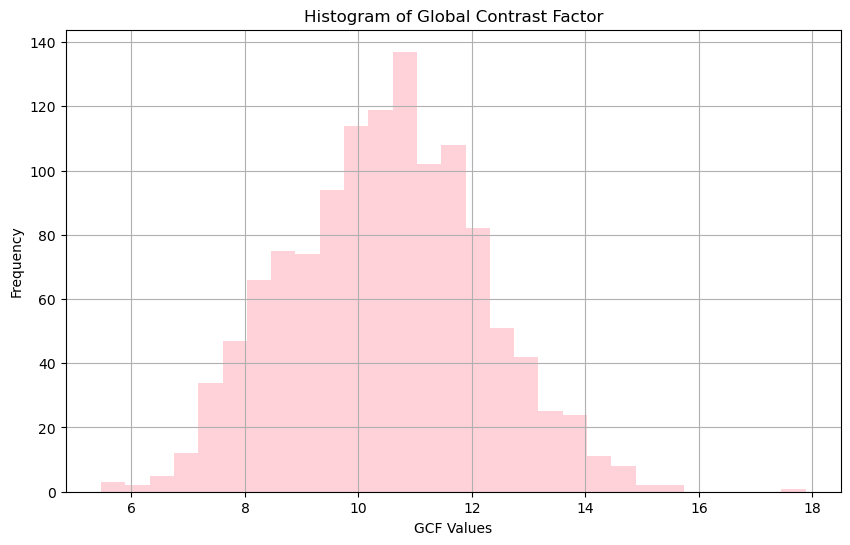

In [10]:
mimic_metrics = directory_metrics(mimic_path)
summarize_and_plot_entropy(mimic_metrics, "pink")
summarize_and_plot_laplacian_variance(mimic_metrics, "pink")
summarize_and_plot_gcf(mimic_metrics, "pink")

Mean Entropy: 5.189
Standard Deviation of Entropy: 0.218
Initial Entropy Quantiles:
0.25    5.122688
0.50    5.248010
0.75    5.342879
Name: entropy, dtype: float64
Entropy Quantiles after Outliers Removed:
0.25    5.152124
0.50    5.258286
0.75    5.348773
Name: entropy, dtype: float64


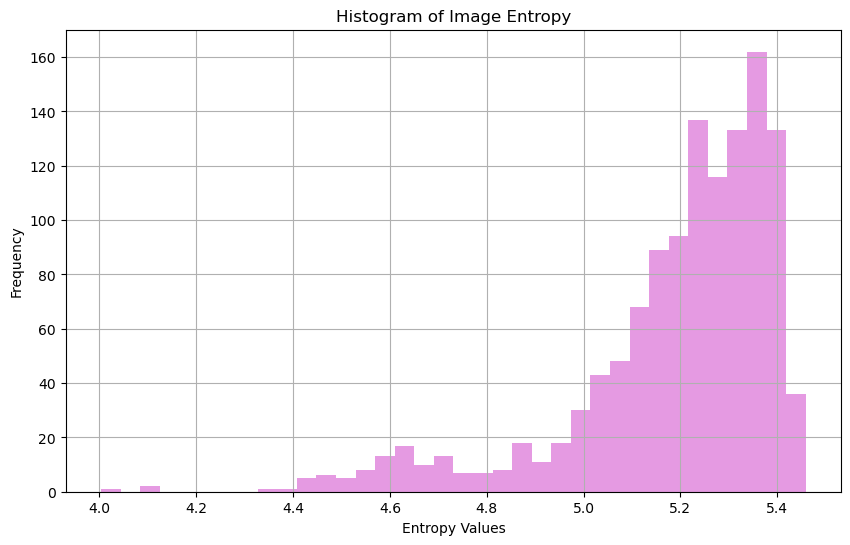

Mean Laplacian Variance: 156.030
Standard Deviation of Laplacian Variance: 98.850
Initial Laplacian Variance Quantiles:
0.25    103.232012
0.50    128.671781
0.75    168.329122
Name: laplacian_variance, dtype: float64
Laplacian Variance Quantiles after Outliers Removed:
0.25    100.216395
0.50    122.329493
0.75    149.923528
Name: laplacian_variance, dtype: float64


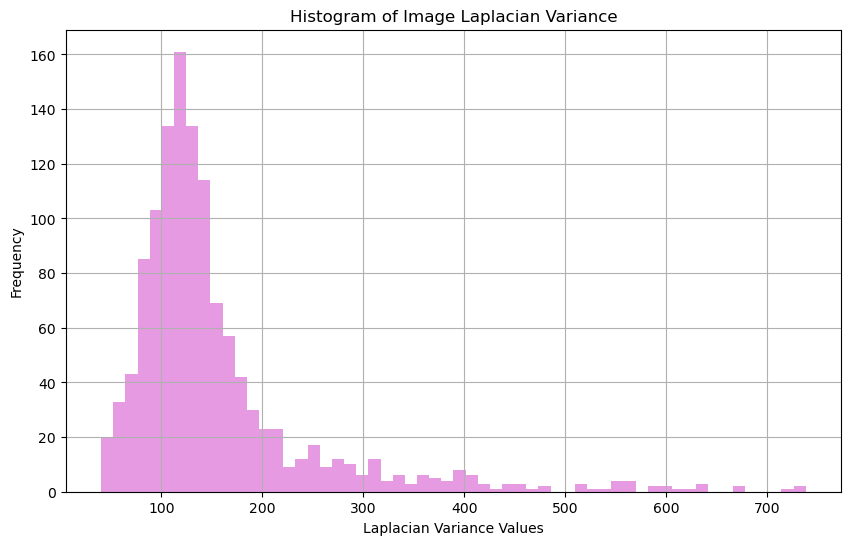

Mean GCF: 9.506
Standard Deviation of GCF: 1.703
Initial GCF Quantiles:
0.25     8.796693
0.50     9.849307
0.75    10.649279
Name: gcf, dtype: float64
GCF Quantiles after Outliers Removed:
0.25     9.007899
0.50     9.954191
0.75    10.697929
Name: gcf, dtype: float64


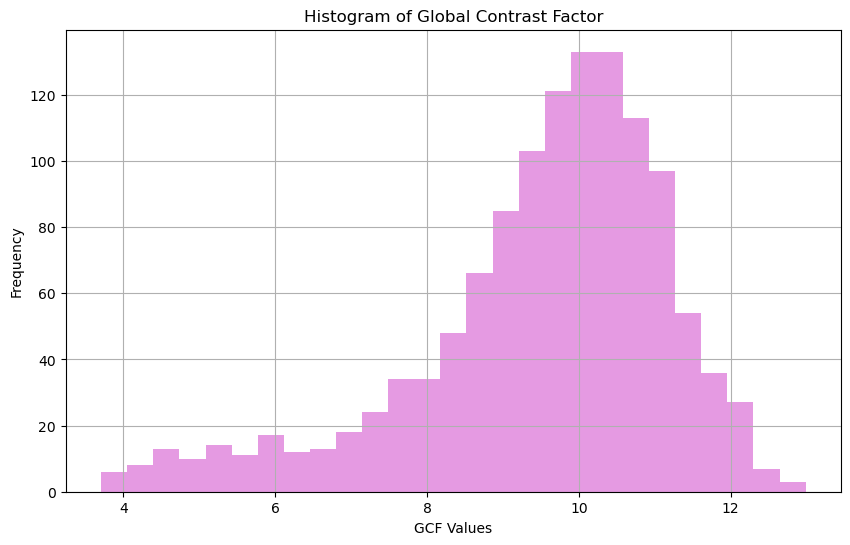

In [11]:
nih_metrics = directory_metrics(nih_path)
summarize_and_plot_entropy(nih_metrics, "orchid")
summarize_and_plot_laplacian_variance(nih_metrics, "orchid")
summarize_and_plot_gcf(nih_metrics, "orchid")

Mean Entropy: 5.245
Standard Deviation of Entropy: 0.147
Initial Entropy Quantiles:
0.25    5.187807
0.50    5.272255
0.75    5.334972
Name: entropy, dtype: float64
Entropy Quantiles after Outliers Removed:
0.25    5.197397
0.50    5.275382
0.75    5.336599
Name: entropy, dtype: float64


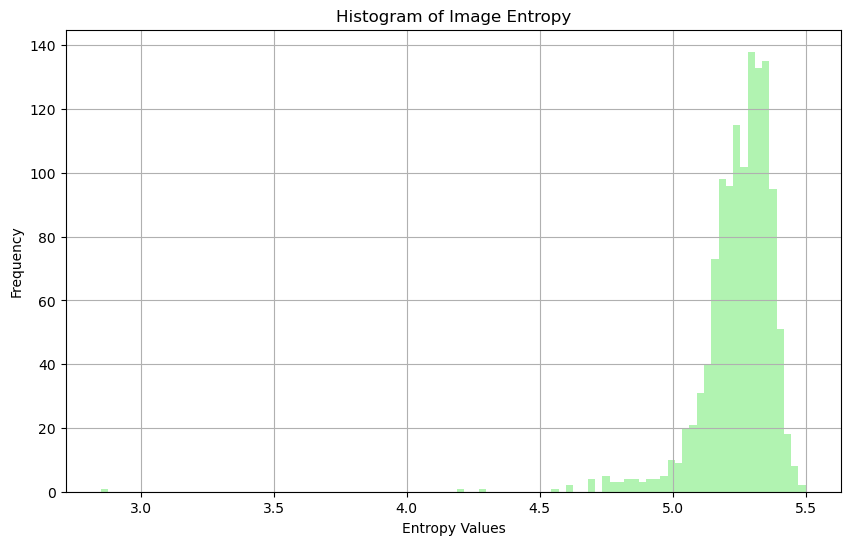

Mean Laplacian Variance: 181.910
Standard Deviation of Laplacian Variance: 91.431
Initial Laplacian Variance Quantiles:
0.25    102.977724
0.50    177.814046
0.75    233.509907
Name: laplacian_variance, dtype: float64
Laplacian Variance Quantiles after Outliers Removed:
0.25    102.378844
0.50    175.698124
0.75    230.070627
Name: laplacian_variance, dtype: float64


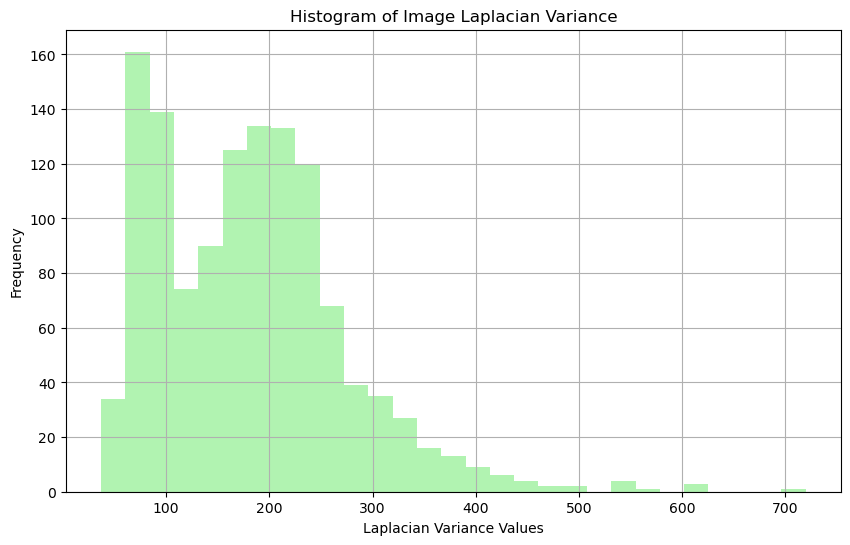

Mean GCF: 9.054
Standard Deviation of GCF: 1.278
Initial GCF Quantiles:
0.25    8.180072
0.50    9.000209
0.75    9.874001
Name: gcf, dtype: float64
GCF Quantiles after Outliers Removed:
0.25    8.175042
0.50    8.996872
0.75    9.862110
Name: gcf, dtype: float64


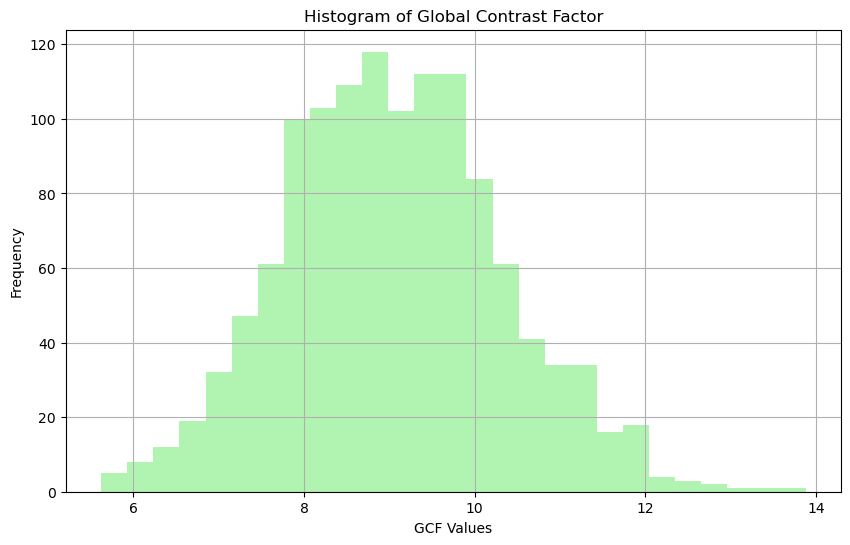

In [12]:
padchest_metrics = directory_metrics(padchest_path)
summarize_and_plot_entropy(padchest_metrics, "lightgreen")
summarize_and_plot_laplacian_variance(padchest_metrics, "lightgreen")
summarize_and_plot_gcf(padchest_metrics, "lightgreen")

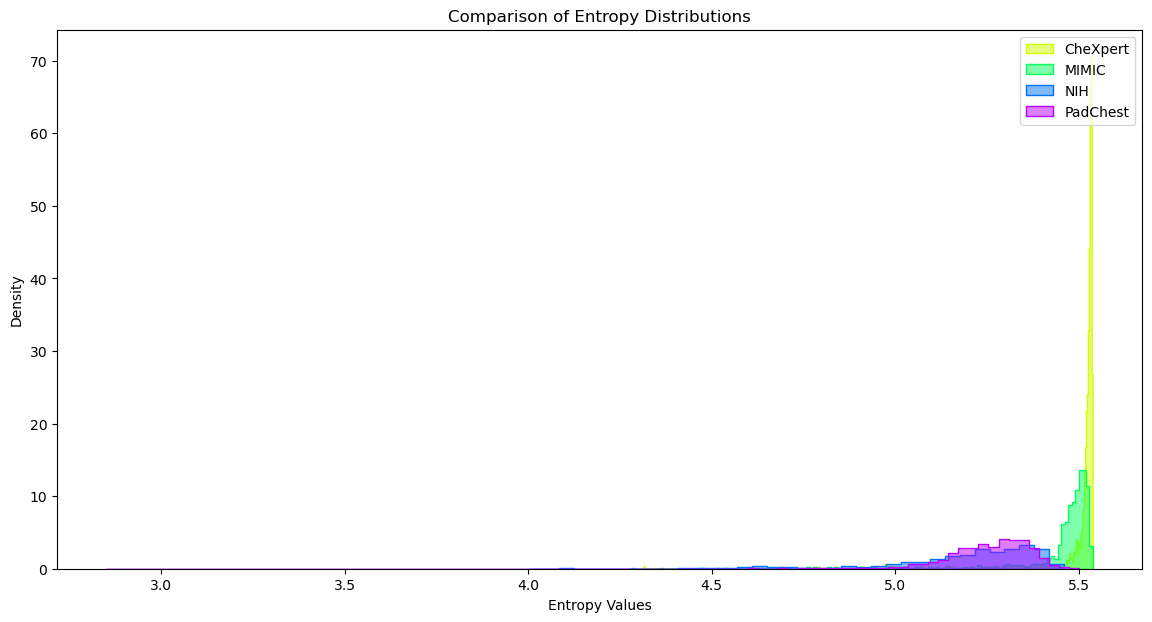

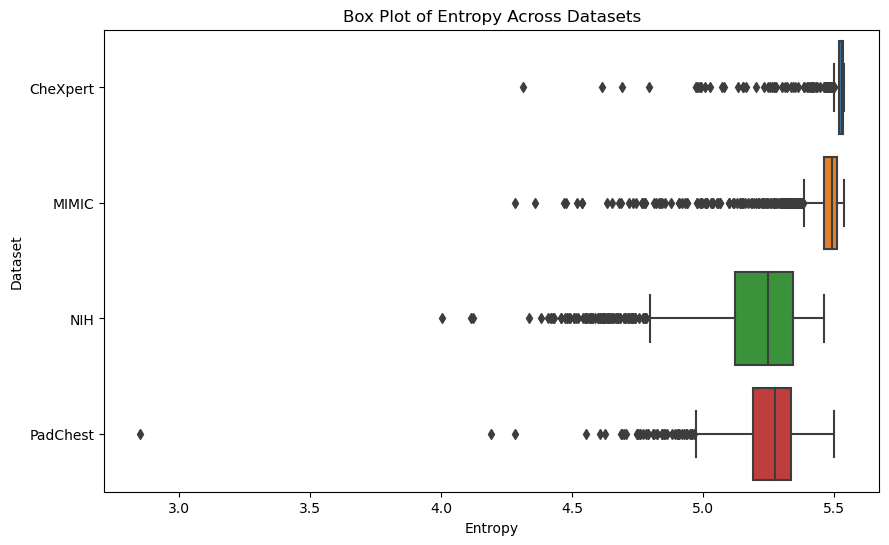

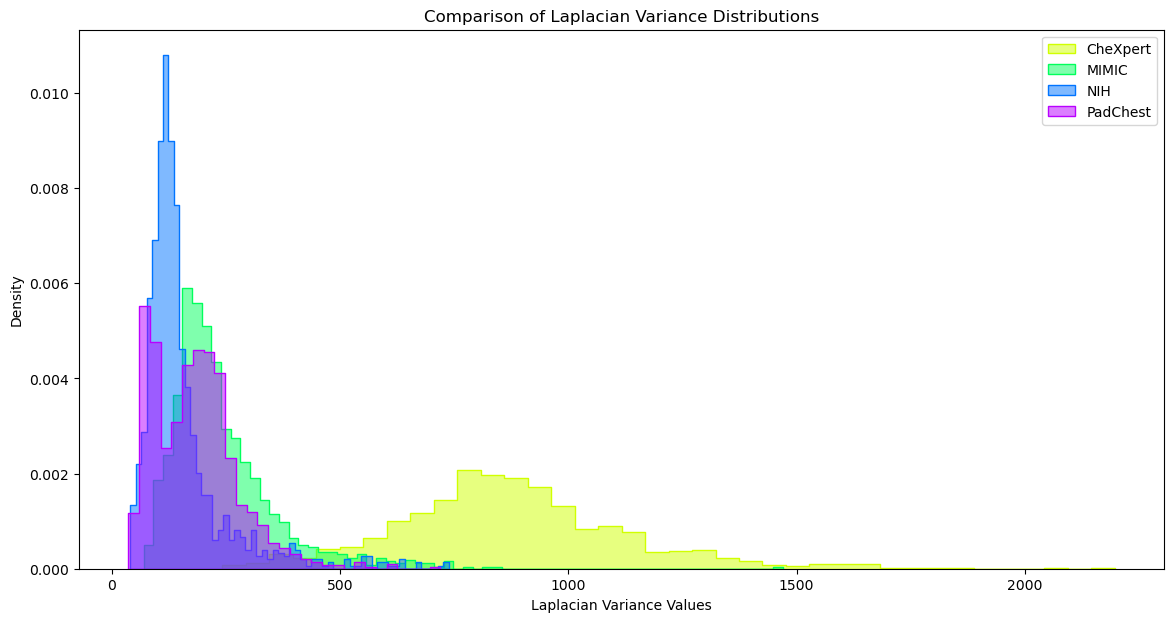

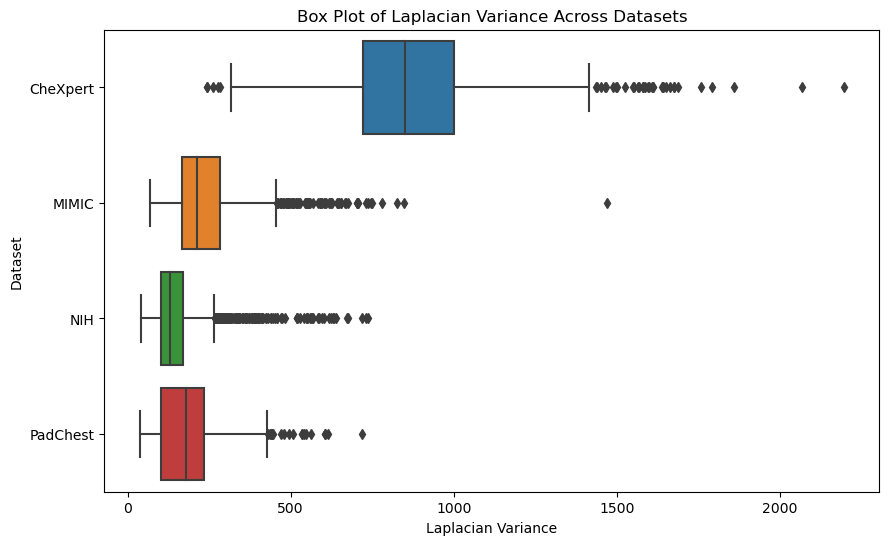

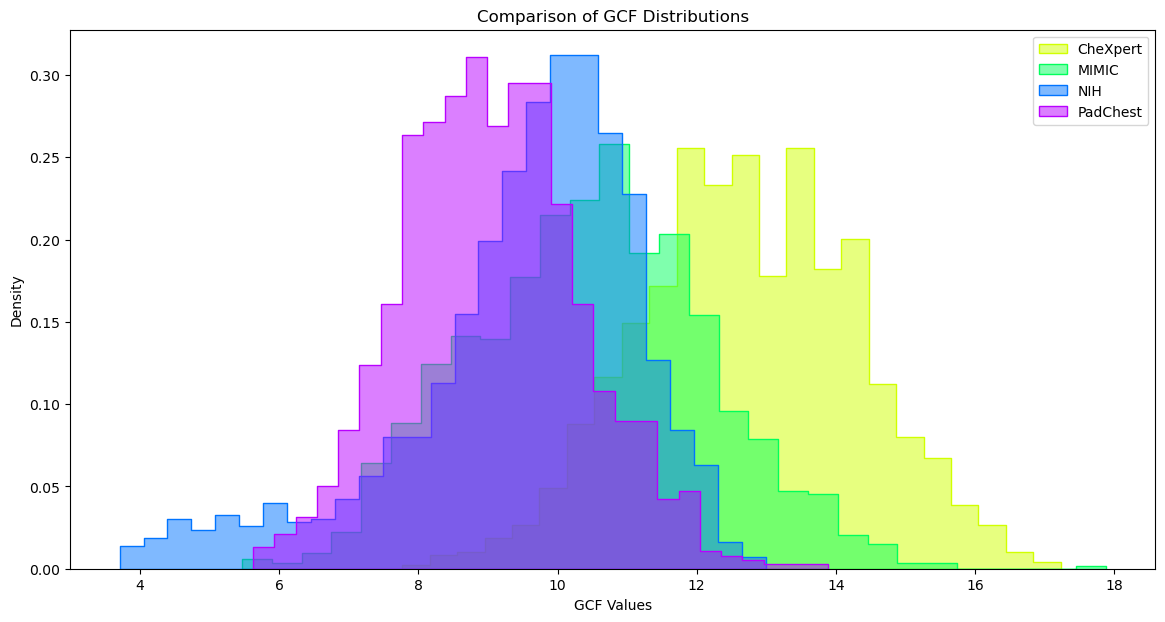

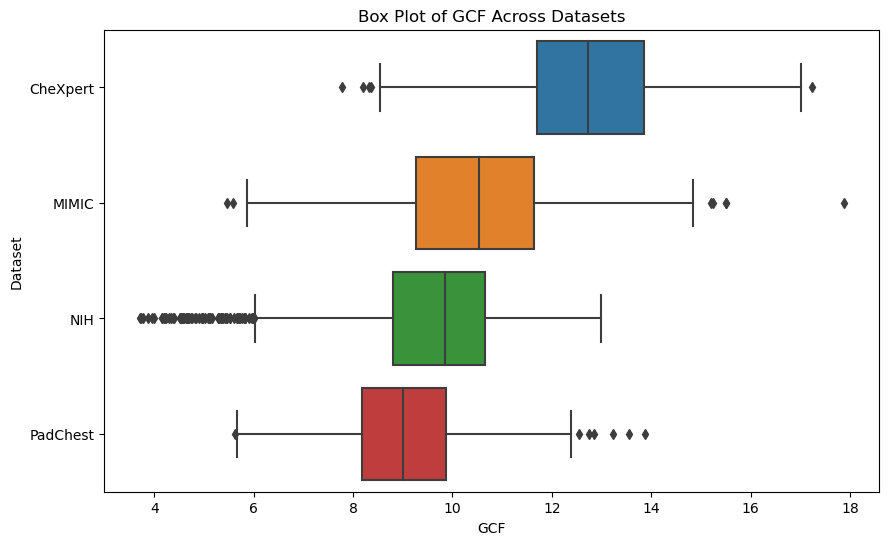

In [13]:
compare_entropy_datasets([chexpert_metrics, mimic_metrics, nih_metrics, padchest_metrics], ['CheXpert', 'MIMIC', 'NIH', 'PadChest'])

compare_laplacian_variance_datasets([chexpert_metrics, mimic_metrics, nih_metrics, padchest_metrics], ['CheXpert', 'MIMIC', 'NIH', 'PadChest'])

compare_gcf_datasets([chexpert_metrics, mimic_metrics, nih_metrics, padchest_metrics], ['CheXpert', 'MIMIC', 'NIH', 'PadChest'])


In [14]:
correlation_chexpert = correlation_coefficient(chexpert_metrics, "Chexpert")
correlation_mimic = correlation_coefficient(mimic_metrics, "Mimic")
correlation_nih = correlation_coefficient(nih_metrics, "NIH")
correlation_padchest = correlation_coefficient(padchest_metrics, "PadChest")

Correlation Coefficient between GCF and Laplacian Variance in Chexpert: 0.3929
Correlation Coefficient between GCF and Laplacian Variance in Mimic: 0.2701
Correlation Coefficient between GCF and Laplacian Variance in NIH: 0.1855
Correlation Coefficient between GCF and Laplacian Variance in PadChest: 0.4290


Correlation between gcf and laplacian_variance in Chexpert: 0.3929
Correlation between gcf and laplacian_variance in Mimic: 0.2701
Correlation between gcf and laplacian_variance in NIH: 0.1855
Correlation between gcf and laplacian_variance in PadChest: 0.4290


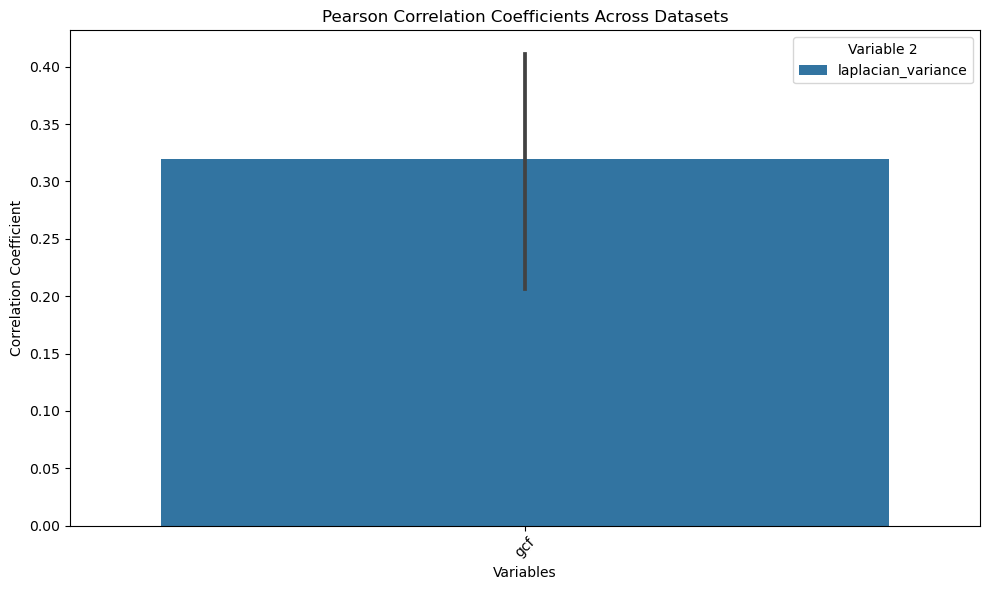

,Dataset,Variable 1,Variable 2,Correlation
0,Chexpert,gcf,laplacian_variance,0.392881
1,Mimic,gcf,laplacian_variance,0.270094
2,NIH,gcf,laplacian_variance,0.185515
3,PadChest,gcf,laplacian_variance,0.429011


In [ ]:
# Create a dictionary of DataFrames, where each DataFrame contains data for a specific class
chexpert_subsets = {class_name: data.reset_index(drop=True) for class_name, data in chexpert_metrics.groupby('class')}
# Access a subset DataFrame for a specific class
chexpert_no_finding_metrics = chexpert_subsets['No-Finding']  
chexpert_cardiomegaly_metrics = chexpert_subsets['Cardiomegaly']  



In [ ]:
summarize_and_plot_entropy(chexpert_no_finding_metrics, 'blue')
summarize_and_plot_laplacian_variance(chexpert_no_finding_metrics, 'blue')
summarize_and_plot_gcf(chexpert_no_finding_metrics, "blue")

summarize_and_plot_entropy(chexpert_cardiomegaly_metrics, 'darkblue')
summarize_and_plot_laplacian_variance(chexpert_cardiomegaly_metrics, 'darkblue')
summarize_and_plot_gcf(chexpert_cardiomegaly_metrics, "darkblue")



In [ ]:
compare_entropy_datasets([chexpert_no_finding_metrics,chexpert_cardiomegaly_metrics], ['CheXpert: No-Finding', 'CheXpert: Cardiomegaly'])

compare_laplacian_variance_datasets([chexpert_no_finding_metrics,chexpert_cardiomegaly_metrics], ['CheXpert: No-Finding','CheXpert: Cardiomegaly'] )

compare_gcf_datasets([chexpert_no_finding_metrics,chexpert_cardiomegaly_metrics], ['CheXpert: No-Finding', 'CheXpert: Cardiomegaly'])


In [ ]:
# Create a dictionary of DataFrames, where each DataFrame contains data for a specific class
mimic_subsets = {class_name: data.reset_index(drop=True) for class_name, data in mimic_metrics.groupby('class')}
# Access a subset DataFrame for a specific class
mimic_no_finding_metrics = mimic_subsets['No-Finding']  
mimic_cardiomegaly_metrics = mimic_subsets['Cardiomegaly']  

In [ ]:
summarize_and_plot_entropy(mimic_no_finding_metrics, 'hotpink')
summarize_and_plot_laplacian_variance(mimic_no_finding_metrics, 'hotpink')
summarize_and_plot_gcf(mimic_no_finding_metrics, "hotpink")


summarize_and_plot_entropy(mimic_cardiomegaly_metrics, 'deeppink')
summarize_and_plot_laplacian_variance(mimic_cardiomegaly_metrics, 'deeppink')
summarize_and_plot_gcf(mimic_cardiomegaly_metrics, "deeppink")


In [ ]:
compare_entropy_datasets([mimic_no_finding_metrics,mimic_cardiomegaly_metrics], ['MIMIC: No-Finding', 'MIMIC: Cardiomegaly'])

compare_laplacian_variance_datasets([mimic_no_finding_metrics,mimic_cardiomegaly_metrics], ['MIMIC: No-Finding', 'MIMIC: Cardiomegaly'])

compare_gcf_datasets([mimic_no_finding_metrics,mimic_cardiomegaly_metrics], ['MIMIC: No-Finding', 'MIMIC: Cardiomegaly'])


In [ ]:
# Create a dictionary of DataFrames, where each DataFrame contains data for a specific class
nih_subsets = {class_name: data.reset_index(drop=True) for class_name, data in nih_metrics.groupby('class')}
# Access a subset DataFrame for a specific class
nih_no_finding_metrics = nih_subsets['No-Finding']  
nih_cardiomegaly_metrics = nih_subsets['Cardiomegaly']  

In [ ]:
summarize_and_plot_entropy(nih_no_finding_metrics, 'mediumpurple')
summarize_and_plot_laplacian_variance(nih_no_finding_metrics, 'mediumpurple')
summarize_and_plot_gcf(nih_no_finding_metrics, "mediumpurple")

summarize_and_plot_entropy(nih_cardiomegaly_metrics, 'darkorchid')
summarize_and_plot_laplacian_variance(nih_cardiomegaly_metrics, 'darkorchid')
summarize_and_plot_gcf(nih_cardiomegaly_metrics, "darkorchid")


In [ ]:
compare_entropy_datasets([nih_no_finding_metrics,nih_cardiomegaly_metrics], ['NIH: No-Finding', 'NIH: Cardiomegaly'])

compare_laplacian_variance_datasets([nih_no_finding_metrics,nih_cardiomegaly_metrics], ['NIH: No-Finding', 'NIH: Cardiomegaly'])

compare_gcf_datasets([nih_no_finding_metrics,nih_cardiomegaly_metrics], ['NIH: No-Finding', 'NIH: Cardiomegaly'])



In [ ]:
# Create a dictionary of DataFrames, where each DataFrame contains data for a specific class
padchest_subsets = {class_name: data.reset_index(drop=True) for class_name, data in padchest_metrics.groupby('class')}
# Access a subset DataFrame for a specific class
padchest_no_finding_metrics = padchest_subsets['No-Finding']  
padchest_cardiomegaly_metrics = padchest_subsets['Cardiomegaly']  

In [ ]:
summarize_and_plot_entropy(padchest_no_finding_metrics, 'limegreen')
summarize_and_plot_laplacian_variance(padchest_no_finding_metrics, 'limegreen')
summarize_and_plot_gcf(padchest_no_finding_metrics, "limegreen")

summarize_and_plot_entropy(padchest_cardiomegaly_metrics, 'darkgreen')
summarize_and_plot_laplacian_variance(padchest_cardiomegaly_metrics, 'darkgreen')
summarize_and_plot_gcf(padchest_cardiomegaly_metrics, "darkgreen")


In [ ]:
compare_entropy_datasets([padchest_no_finding_metrics,padchest_cardiomegaly_metrics], ['PadChest: No-Finding', 'PadChest: Cardiomegaly'])

compare_laplacian_variance_datasets([padchest_no_finding_metrics,padchest_cardiomegaly_metrics], ['PadChest: No-Finding', 'PadChest: Cardiomegaly'])

compare_gcf_datasets([padchest_no_finding_metrics,padchest_cardiomegaly_metrics], ['PadChest: No-Finding', 'PadChest: Cardiomegaly'])


In [ ]:
# Call the function on each DataFrame
display_image_metrics(chexpert_metrics, "CheXpert Dataset")
display_image_metrics(mimic_metrics, "MIMIC Dataset")
display_image_metrics(nih_metrics, "NIH Dataset")
display_image_metrics(padchest_metrics, "PadChest Dataset")
